In [1]:
import imp
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import pandas as pd
import os
import matplotlib.pyplot as plt
from typing import List
from tqdm import tqdm

In [2]:
## データ読み込み
INPUT_DIR = r'C:\Users\Masat\デスクトップ_Instead\webアプリ開発\twitter_API_sawabe'
df = pd.read_csv(os.path.join(INPUT_DIR, 'sawabe_tweet_2022226.csv'),
 header=0)
df.head()

,text
0,ターンも今週聴けてないから聴きたいけど今週澤部さんいないのかあ〜〜〜…そうかあ…………最近あ...
1,澤部が株やるだけであの澤部が！？って言われるの可哀想過ぎてわらう
2,ハライチ澤部、コロナ濃厚接触者発表するもニュースにならず！心配されたのは櫻坂番組のことだけだ...
3,M-1ツアーでハライチ出てないの叩かれてるけど、見取り図が1公演しか出れないのに、それよりテ...
4,澤部の身長


In [3]:
len(df)

2682

In [3]:
# 関数の定義
def get_nouns(sentence, noun_list):
    t = Tokenizer()
    for token in t.tokenize(sentence):
        split_token = token.part_of_speech.split(',')
        ## 名詞を抽出
        if split_token[0] == '名詞' or split_token[0] == '形容詞':
            # surface属性が表層形
            # noun_list.append(token.surface)
            noun_list.append(token.base_form)

    return noun_list

def remove_sawabe_haraichi(noun_list:List)->List:
    # 「サワベ」や「ハライチ」を単語リストから取り除く.
    remove_target = ['澤', '部', 'さわべ', 'サワベ', 'ハライチ', 'はらいち', 'ハラ', 'イチ']
    noun_list = [element for element in noun_list if element not in remove_target]
    # その他不要語を取り除く
    remove_target = ['さん', 'くん', 'ちゃん', 'もの', 'こと', 'それ', 'これ', 'あれ']
    noun_list = [element for element in noun_list if element not in remove_target]
    
    # 一文字の単語を取り除く
    noun_list = [element for element in noun_list if len(element)>1]

    return noun_list

def create_word_cloud(noun_list):
    ## 名詞リストの要素を空白区切りにする(word_cloudの仕様)
    noun_space = ' '.join(map(str, noun_list))
    ## word cloudの設定(フォントの設定)
    wc = WordCloud(background_color="white", font_path=r"C:/WINDOWS/Fonts/msgothic.ttc", width=300,height=300)
    output_image = wc.generate(noun_space)
    ## 出力画像の大きさの指定
    plt.figure(figsize=(5,5))
    ## 目盛りの削除
    plt.tick_params(labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False,
                   length=0)
    ## word cloudの表示
    plt.imshow(wc)
    plt.savefig(os.path.join(INPUT_DIR, 'wordcrowd_sawabe.png'), dpi=300)
    plt.show()


In [6]:
noun_list = []
# 各Tweetを繰り返し処理で形態素解析していく.
for sentence in tqdm(list(df['text'])):
    get_nouns(sentence, noun_list)


100%|██████████| 2682/2682 [06:55<00:00,  6.46it/s]


In [7]:
print(noun_list[:100])
print(len(noun_list))

noun_list = remove_sawabe_haraichi(noun_list=noun_list)
print(noun_list[:100])
print(len(noun_list))


['ターン', '今週', '今週', '澤', '部', 'さん', 'の', '最近', '自分', '好き', 'もの', 'コロナ', '影響', '如実', 'こと', '少ない', '平和', 'ボケ', 'コロナ', '禍', '澤', '部', '株', '澤', '部', '可哀想', 'ハラ', 'イチ', '澤', '部', 'コロナ', '濃厚', '接触', '者', '発表', 'ニュース', '心配', 'の', '櫻', '坂', '番組', 'こと', '世界', '–', 'M', '-', '1', 'ツアー', 'ハラ', 'イチ', 'の', '見取り図', '1', '公演', 'それ', 'テレビ', '出演', '数', '多い', 'ハラ', 'イチ', '2021', '年', '見取り図', 'コンビ', '合計', '200', '本', 'ハラ', 'イチ', '澤', '部', '300', '本', 'テレビ', 'わけ', '午前', '中', '一', '回', '乗り', '可能', '吉本', '金', '澤', '部', '身長', '眉毛', 'コメカミ', '距離', 'ハラ', 'イチ', '澤', '部', 'さん', 'ん', '@', 'tbsr', '_', 'ht']
39457
['ターン', '今週', '今週', '最近', '自分', '好き', 'コロナ', '影響', '如実', '少ない', '平和', 'ボケ', 'コロナ', '可哀想', 'コロナ', '濃厚', '接触', '発表', 'ニュース', '心配', '番組', '世界', 'ツアー', '見取り図', '公演', 'テレビ', '出演', '多い', '2021', '見取り図', 'コンビ', '合計', '200', '300', 'テレビ', 'わけ', '午前', '乗り', '可能', '吉本', '身長', '眉毛', 'コメカミ', '距離', 'tbsr', 'ht', 'うち', '期待', 'マナブ', '27', 'テレ朝', '18', '00', '19', '00', 'マナブ', '小田原', '美味しい', 'かまぼこ', 'グランプリ', '出演', '雅紀',

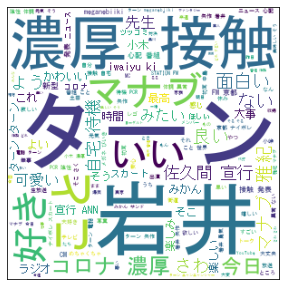

In [52]:
create_word_cloud(noun_list=noun_list)

# アソシエーション分析と共起ネットワークの生成

In [4]:
# 共起ネットワークの為のデータ整形
# 形態素解析 関数(共起ネットワーク用)の定義
def devide_nouns(sentence:str)->List:
    noun_list = []
    t = Tokenizer()
    for token in t.tokenize(sentence):
        split_token = token.part_of_speech.split(',')
        ## 名詞と形容詞のみを抽出して、返値のリストに加える
        if split_token[0] == '名詞' or split_token[0] == '形容詞':
            noun_list.append(token.base_form)
    
    # 見出し語等の処理
    noun_list = remove_sawabe_haraichi(noun_list=noun_list)
    
    return noun_list

In [5]:
# 各Tweetを繰り返し処理で形態素解析していく.
df['text_devided'] = ''
for i, sentence in enumerate(tqdm(list(df['text']))):
    df['text_devided'][i] = devide_nouns(sentence)

100%|██████████| 2682/2682 [05:09<00:00,  8.66it/s]


In [6]:
# 形態素解析の結果の確認
df.head()

,text,text_devided
0,ターンも今週聴けてないから聴きたいけど今週澤部さんいないのかあ〜〜〜…そうかあ…………最近あ...,"[ターン, 今週, 今週, 最近, 自分, 好き, コロナ, 影響, 如実, 少ない, 平和..."
1,澤部が株やるだけであの澤部が！？って言われるの可哀想過ぎてわらう,[可哀想]
2,ハライチ澤部、コロナ濃厚接触者発表するもニュースにならず！心配されたのは櫻坂番組のことだけだ...,"[コロナ, 濃厚, 接触, 発表, ニュース, 心配, 番組, 世界]"
3,M-1ツアーでハライチ出てないの叩かれてるけど、見取り図が1公演しか出れないのに、それよりテ...,"[ツアー, 見取り図, 公演, テレビ, 出演, 多い, 2021, 見取り図, コンビ, ..."
4,澤部の身長,[身長]


In [7]:
import itertools
# 共起ネットワークの為のデータ整形
## DataFrameの要素(List)＝＞ListのListへ
noun_sentences = list(df['text_devided'])

## 文章内での単語の組み合わせを作る
combination_sentences = [list(itertools.combinations(words, 2)) for words in noun_sentences]
## 重複を取り除く?
combination_sentences = [[tuple(sorted(combi)) for combi in combinations] for combinations in combination_sentences]

temp_list = []
for combinations in combination_sentences:
    temp_list.extend(combinations)
combination_sentences = temp_list
del temp_list
print(combination_sentences[0:10])
len(combination_sentences)

[('ターン', '今週'), ('ターン', '今週'), ('ターン', '最近'), ('ターン', '自分'), ('ターン', '好き'), ('コロナ', 'ターン'), ('ターン', '影響'), ('ターン', '如実'), ('ターン', '少ない'), ('ターン', '平和')]


99065

In [12]:
import collections
# エッジの重み(線の太さ)として、Jaccard係数を算出する関数
def make_jaccard_coef_data(combination_sentences:List[tuple]):
    '''
    エッジの重み(線の太さ)として、Jaccard係数を算出する関数
    '''
    # リストから、全ての要素の出現回数(=n(A且つB))をカウントする.
    combi_count = collections.Counter(combination_sentences)
    # それを再度、ListのListとして保存する
    word_associates = []
    # 各組み合わせの"内容"と"出現回数"をイテレート:
    for key, value in combi_count.items():
        #[単語A, 単語B, n(A且つB)]
        word_associates.append([key[0], key[1], value])

    # [単語A, 単語B, n(A且つB)]をDataFrame化
    word_associates = pd.DataFrame(word_associates, columns=['word1', 'word2', 'cooccurrence_num'])

    # 各単語の出現回数を算出するプロセス
    words = []
    for combi in combination_sentences:
        words.extend(combi)
    # 各単語の出現回数を算出
    word_count = collections.Counter(words)
    # それをListのListに加工
    word_count = [[key, value] for key, value in word_count.items()]
    # それをDataFrame化
    word_count = pd.DataFrame(word_count, columns=['word', 'count'])
    
    #上記のプロセスで得た、2つのDataFrameを結合
    ## まずはn(A)のみを結合する
    word_associates = pd.merge(
        left=word_associates, 
        # renameは必要ある?なんでだろう？？=>単語1と単語2の、二回結合するから！
        right=word_count.rename(columns={'word':'word1'}),
        on='word1', how='left'
    )
    ## n(A)のカラム名を修正しておく
    word_associates.rename(columns={'count':'count1'}, inplace=True)
    ##次にn(B)
    word_associates = word_associates.merge(
        right=word_count.rename(columns={'word':'word2'}),
        on='word2', how='left'
    )
    ## n(B)のカラム名を修正しておく
    word_associates.rename(columns={'count':'count2'}, inplace=True)

    # n(AまたはB)算出
    ## assignメソッドで新たな列を追加する(列名=値のキーワード引数を渡す!)
    word_associates = word_associates.assign(
        union_num=word_associates['count1'] + word_associates['count2'] - word_associates['cooccurrence_num']
        )
    # Jaccard係数の算出
    word_associates = word_associates.assign(
        jaccard_coef=word_associates['cooccurrence_num']/word_associates['union_num']
        )
    ## 並び代え
    word_associates = word_associates.sort_values(by=['jaccard_coef', 'cooccurrence_num'],
    ascending=[False, False] # 降順を指定
    )

    return word_associates

df2 = make_jaccard_coef_data(combination_sentences=combination_sentences)

df2.head()

,word1,word2,cooccurrence_num,count1,count2,union_num,jaccard_coef
11737,Botdayo,Yokai,1,1,1,1,1.0
14016,goldenokinawa,感情,1,1,1,1,1.0
23029,1205,ken,1,1,1,1,1.0
25062,Cha,Rera,1,1,1,1,1.0
27579,ジレンマ,チュー,1,1,1,1,1.0


In [ ]:
# Jaccard係数を算出できたので、その分布状況を見たい.

group_values = [0, 0.01]

In [1]:
# build network
import networkx as nx

G = nx.Graph()
G.add_nodes_from(features, size=10)

NameError: name 'features' is not defined